In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz 
import matplotlib.pyplot as plt
import graphviz

In [2]:
df = pd.read_csv("new_2.csv")
df.head()

,price,Lng,Lat,DOM,livingRoom,kitchen,bathRoom,floor,buildingStructure,ladderRatio,elevator,subway,communityAverage
0,31680,116.475489,40.019520,1464,2,1,1,26,6,0.217,1,1,56021
1,43436,116.453917,39.881534,903,2,1,2,22,6,0.667,1,0,71539
2,52021,116.561978,39.877145,1271,3,1,3,4,6,0.500,1,0,48160
3,22202,116.438010,40.076114,965,3,1,1,21,6,0.273,1,0,51238
4,48396,116.428392,39.886229,927,2,1,1,6,2,0.333,0,1,62588


In [4]:
dataset=np.genfromtxt('new_2.csv',delimiter=',',skip_header=1)
x = dataset[:, 2:3].astype(float) 
y = dataset[:, 0].astype(float) 
regr_1 = DecisionTreeRegressor(criterion='mse', max_depth=2,random_state = 0)
regr_1.fit(x,y)
y_1 = regr_1.predict(x)

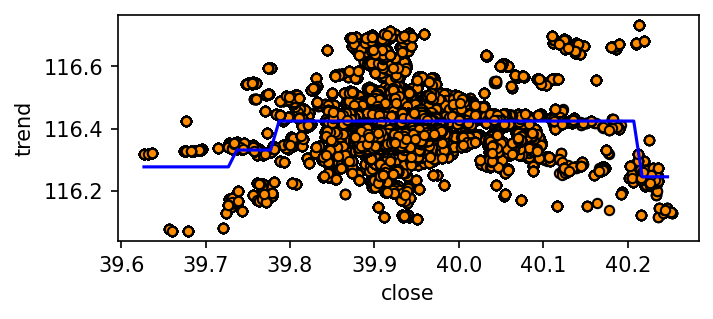

In [5]:
plt.figure(figsize=(5, 2), dpi=150)
plt.scatter(x, y, s=20, edgecolor="black",c="darkorange", label="data")
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
#plt.scatter(x, y_1, color="b")
plt.plot(x_grid, regr_1.predict(x_grid), color ="b")
plt.ylabel("trend")
plt.xlabel("close")
plt.show()

In [9]:
export_graphviz(regr_1, out_file ='tree.dot',feature_names =['Workplace'])

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH